Empirical analysis with Getula eastern pops lumped following K=2
* 8 populations total and downsampling to 8 haploid samples per population

In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import datetime
import glob
import ipyparallel as ipp
import matplotlib.pyplot as plt
import momi
import numpy as np
import os
import pandas as pd
import PTA

from IPython.display import display

pd.set_option('display.max_columns', None)

ipyclient = ipp.Client(cluster_id="ipyrad")
print(len(ipyclient))

# For this to work dadi must be installed
easySFS = "/home/isaac/easySFS/easySFS.py"
!which $easySFS


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
40
/home/isaac/easySFS/easySFS.py


In [2]:
# Set up some directories
prefix = "/home/isaac/media4TB/PTA-EasternSnakes/"
analysis_dir = prefix + "analysis/"
pops_dir = prefix + "East_snakes_PTA_input/pops_files/"
vcf_dir = prefix + "East_snakes_PTA_input/vcf_files/"
sfs_dir = prefix + "East_snakes_PTA_input/sfs_files/"

# Populations files for each pop were made with the "make_pops_SFS_stairway script"
all_pops = glob.glob(pops_dir + "*")
all_pops = sorted([x.split("/")[-1].rsplit(".", 1)[0] for x in all_pops])

all_pops

['Acontortrix_p123_v2_25miss_popAcontortrix',
 'Dpunctatus_p123_v3_25missEAST_popDpunctatus',
 'Lgetula_p123_v2_25miss_popk2east',
 'Lgetula_p123_v2_25miss_popk4get',
 'Lgetula_p123_v2_25miss_popk4holbnig',
 'Mflagellum_p123_v3_25missEast_popeast',
 'Pguttatus_p123_v2_25miss_popemor',
 'Pguttatus_p123_v2_25miss_popgut',
 'Sdekayi_p123_v2_25miss_popSdekayi',
 'abacura_only_popeast',
 'abacura_only_popwest',
 'erytro_poperytro',
 'milks_denovo-92_popelap',
 'milks_denovo-92_poptri']

In [3]:
expanding_pops = ["abacura_only_popeast",
                    "Acontortrix_p123_v2_25miss_popAcontortrix",
                    "Dpunctatus_p123_v3_25missEAST_popDpunctatus",
                    "Lgetula_p123_v2_25miss_popk2east",
#                    "Lgetula_p123_v2_25miss_popk4get",
#                    "Lgetula_p123_v2_25miss_popk4holbnig",
                    "Mflagellum_p123_v3_25missEast_popeast",
                    "milks_denovo-92_popelap",
                    "milks_denovo-92_poptri",
                    "Pguttatus_p123_v2_25miss_popgut"]
bottleneck_pops = ["abacura_only_popwest",
                    "erytro_poperytro",
                    "Pguttatus_p123_v2_25miss_popemor",
                    "Sdekayi_p123_v2_25miss_popSdekayi"]
print(expanding_pops)
print(bottleneck_pops)

['abacura_only_popeast', 'Acontortrix_p123_v2_25miss_popAcontortrix', 'Dpunctatus_p123_v3_25missEAST_popDpunctatus', 'Lgetula_p123_v2_25miss_popk2east', 'Mflagellum_p123_v3_25missEast_popeast', 'milks_denovo-92_popelap', 'milks_denovo-92_poptri', 'Pguttatus_p123_v2_25miss_popgut']
['abacura_only_popwest', 'erytro_poperytro', 'Pguttatus_p123_v2_25miss_popemor', 'Sdekayi_p123_v2_25miss_popSdekayi']


In [10]:
## prototype the easySFS preview call for one population
pop = "Mflagellum_p123_v3_25missEast_popeast" # define the population
in_vcf = vcf_dir + pop + ".vcf" # define the vcf file location
pop_file = pops_dir + pop + ".txt" # define the population file location
print(in_vcf)
print(pop_file)

!$easySFS -i "$in_vcf" -p "$pop_file" -a --preview # run easySFS preview

/home/isaac/media4TB/PTA-EasternSnakes/East_snakes_PTA_input/vcf_files/Mflagellum_p123_v3_25missEast_popeast.vcf
/home/isaac/media4TB/PTA-EasternSnakes/East_snakes_PTA_input/pops_files/Mflagellum_p123_v3_25missEast_popeast.txt
Processing 1 populations - odict_keys(['east'])

    Running preview mode. We will print out the results for # of segregating sites
    for multiple values of projecting down for each population. The dadi
    manual recommends maximizing the # of seg sites for projections, but also
    a balance must be struck between # of seg sites and sample size.

    For each population you should choose the value of the projection that looks
    best and then rerun easySFS with the `--proj` flag.
    
east
(2, 19660)	(3, 29401)	(4, 36806)	(5, 42673)	(6, 48225)	(7, 53082)	(8, 57796)	(9, 61895)	(10, 66107)	(11, 68877)	(12, 72728)	(13, 71088)	(14, 74566)	(15, 46449)	(16, 48421)	(17, 21200)	(18, 21997)	




In [12]:
# Get easySFS preview results for all populations
preview_dict = {}
for pop in all_pops:
    print(pop)
    in_vcf = vcf_dir + pop + ".vcf"
    pop_file = pops_dir + pop + ".txt"
    preview_dict[pop] = !$easySFS -i "$in_vcf" -p "$pop_file" -a --preview

Acontortrix_p123_v2_25miss_popAcontortrix
Dpunctatus_p123_v3_25missEAST_popDpunctatus
Lgetula_p123_v2_25miss_popk2east
Lgetula_p123_v2_25miss_popk4get
Lgetula_p123_v2_25miss_popk4holbnig
Mflagellum_p123_v3_25missEast_popeast
Pguttatus_p123_v2_25miss_popemor
Pguttatus_p123_v2_25miss_popgut
Sdekayi_p123_v2_25miss_popSdekayi
abacura_only_popeast
abacura_only_popwest
erytro_poperytro
milks_denovo-92_popelap
milks_denovo-92_poptri


In [13]:
for k, v in preview_dict.items():
    print(k, "\n", v[-3], "\n")

Acontortrix_p123_v2_25miss_popAcontortrix 
 (2, 6528)	(3, 9771)	(4, 12355)	(5, 14585)	(6, 16629)	(7, 18502)	(8, 20313)	(9, 21991)	(10, 23667)	(11, 25266)	(12, 26853)	(13, 28392)	(14, 29918)	(15, 31397)	(16, 32875)	(17, 34307)	(18, 35747)	(19, 37142)	(20, 38551)	(21, 39933)	(22, 41317)	(23, 42668)	(24, 44030)	(25, 45355)	(26, 46697)	(27, 47997)	(28, 49322)	(29, 50609)	(30, 51917)	(31, 53171)	(32, 54465)	(33, 55686)	(34, 56967)	(35, 58163)	(36, 59431)	(37, 60609)	(38, 61865)	(39, 62999)	(40, 64244)	(41, 65237)	(42, 66470)	(43, 67119)	(44, 68337)	(45, 68133)	(46, 69331)	(47, 66878)	(48, 68026)	(49, 51807)	(50, 52660)	(51, 38546)	(52, 39158)	(53, 27102)	(54, 27514)	(55, 17960)	(56, 18226)	(57, 10641)	(58, 10793)	(59, 5530)	(60, 5607)	(61, 2182)	(62, 2210)	(63, 563)	(64, 570)	 

Dpunctatus_p123_v3_25missEAST_popDpunctatus 
 (2, 11142)	(3, 16589)	(4, 20969)	(5, 24705)	(6, 28135)	(7, 31214)	(8, 34151)	(9, 36732)	(10, 39343)	(11, 41705)	(12, 44080)	(13, 46266)	(14, 48459)	(15, 50506)	(16, 5255

In [4]:
proj_dict = {}
## Expanding
proj_dict["abacura_only_popeast"] = 44
proj_dict["Acontortrix_p123_v2_25miss_popAcontortrix"] = 46
proj_dict["Dpunctatus_p123_v3_25missEAST_popDpunctatus"] = 52
proj_dict["Mflagellum_p123_v3_25missEast_popeast"] = 14
proj_dict["milks_denovo-92_popelap"] = 42
proj_dict["milks_denovo-92_poptri"] = 50
proj_dict["Pguttatus_p123_v2_25miss_popgut"] = 24

proj_dict["Lgetula_p123_v2_25miss_popk2east"] = 50
proj_dict["Lgetula_p123_v2_25miss_popk4get"] = 8
proj_dict["Lgetula_p123_v2_25miss_popk4holbnig"] = 44

## Contracting
proj_dict["abacura_only_popwest"] = 20
proj_dict["erytro_poperytro"] = 23
proj_dict["Pguttatus_p123_v2_25miss_popemor"] = 30
proj_dict["Sdekayi_p123_v2_25miss_popSdekayi"] = 40



In [15]:
proj = 8

# Get easySFS proj results for all populations
# <10 minutes
for pop in all_pops:
    print(pop)
    in_vcf = vcf_dir + pop + ".vcf"
    pop_file = pops_dir + pop + ".txt"
    pop_sfs_dir = sfs_dir + pop
    if not os.path.exists(pop_sfs_dir):
        os.makedirs(pop_sfs_dir)
    !$easySFS -i $in_vcf -p $pop_file -a --proj $proj -o $pop_sfs_dir -f

Acontortrix_p123_v2_25miss_popAcontortrix
Processing 1 populations - odict_keys(['Acontortrix'])
Doing 1D sfs - Acontortrix
Doing multiSFS for all pops
Dpunctatus_p123_v3_25missEAST_popDpunctatus
Processing 1 populations - odict_keys(['Dpunctatus'])
Doing 1D sfs - Dpunctatus
Doing multiSFS for all pops
Lgetula_p123_v2_25miss_popk2east
Processing 1 populations - odict_keys(['k2east'])
Doing 1D sfs - k2east
Doing multiSFS for all pops
Lgetula_p123_v2_25miss_popk4get
Processing 1 populations - odict_keys(['k4get'])
Doing 1D sfs - k4get
Doing multiSFS for all pops
Lgetula_p123_v2_25miss_popk4holbnig
Processing 1 populations - odict_keys(['k4holbnig'])
Doing 1D sfs - k4holbnig
Doing multiSFS for all pops
Mflagellum_p123_v3_25missEast_popeast
Processing 1 populations - odict_keys(['east'])
Doing 1D sfs - east
Doing multiSFS for all pops
Pguttatus_p123_v2_25miss_popemor
Processing 1 populations - odict_keys(['emor'])
Doing 1D sfs - emor
Doing multiSFS for all pops
Pguttatus_p123_v2_25miss_pop

In [4]:
sfs_dict = {}
for pop in all_pops:
    pop_sfs_dir = sfs_dir + pop
    # Load from the dadi formatted sfs file generated by easySFS
    sfs_file = glob.glob(pop_sfs_dir + "/dadi/*.sfs")[-1]
    #sfs_file = pop_sfs_dir + "/dadi/{}.sfs".format(pop)
    sfs_dict[pop] = momi.data.convert.sfs_from_dadi(sfs_file)
exp_sfs = [sfs_dict[x] for x in expanding_pops]
bot_sfs = [sfs_dict[x] for x in bottleneck_pops]
len(exp_sfs)

8

## Generate simulations

In [13]:
# sorted
model = PTA.DemographicModel("expanding-sorted-props")
model.set_param("project_dir", "./analysis/8pops_8samps_expanding_sims")
model.set_param("npops", 8)
model.set_param("nsamps", 8)
model.set_param("N_e", "2e5-5e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "0.01-0.1")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = True
model._hackersonly["proportional_msfs"] = True
model.simulate(nsims=40000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-sorted-props ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/8pops_8samps_expanding_sims ## [1] [project_dir]: Where to save files
8                    ## [2] [npops]: Number of populations undergoing co-demographic processes
8                    ## [3] [nsamps]: Numbers of samples for each populations
200000-5000000       ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
0.01-0.1             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
1                    ## [10] [g

In [7]:
# Unsorted
model = PTA.DemographicModel("expanding-unsorted-props")
model.set_param("project_dir", "./analysis/8pops_8samps_expanding_sims")
model.set_param("npops", 8)
model.set_param("nsamps", 8)
model.set_param("N_e", "2e5-5e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "0.01-0.1")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = False
model._hackersonly["proportional_msfs"] = True
model.simulate(nsims=40000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-unsorted-props ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/8pops_8samps_expanding_sims ## [1] [project_dir]: Where to save files
8                    ## [2] [npops]: Number of populations undergoing co-demographic processes
8                    ## [3] [nsamps]: Numbers of samples for each populations
200000-5000000       ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
0.01-0.1             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] 

## Cross-validation

In [12]:
%%time
# sorted
sorted_sim_df = pd.read_csv("./analysis/8pops_8samps_expanding_sims/expanding-sorted-props-SIMOUT.csv", sep=" ")
synthetic_community = pd.DataFrame(sorted_sim_df.loc[0]).T.drop(PTA.inference.default_targets, axis=1)

gb_params = {'n_estimators': 1000,
             'min_samples_split': 5,
             'min_samples_leaf': 4,
             'max_features': 'auto',
             'max_depth': 10,
             'learning_rate': 0.012589254117941661}

print(len(sorted_sim_df))
gb_sorted = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sorted_sim_df,\
                                algorithm="gb",\
                                verbose=True)
gb_sorted.set_params(gb_params)
gb_sorted.set_targets(["zeta_e", "t_s", "omega"])
gb_sorted.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
sorted_cv_preds1 = gb_sorted.cross_val_predict(verbose=True)
sorted_cv_scores1 = gb_sorted.cross_val_score(verbose=True)
ax = gb_sorted.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

80000
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-11-14 14:28:58.348611
Predict() finished: 2021-11-14 15:21:59.232012
Calculating prediction interval(s)
	zeta_e
	t_s
	omega
                  MAE        RMSE    vscore        R2
zeta_e       0.808126    0.003652  0.806880  0.806879
t_s     150814.331550  700.078103  0.521807  0.521801
omega    47945.451767  234.919317  0.462959  0.462959
CPU times: user 2h 24min 50s, sys: 45.6 s, total: 2h 25min 36s
Wall time: 4h 54min 47s


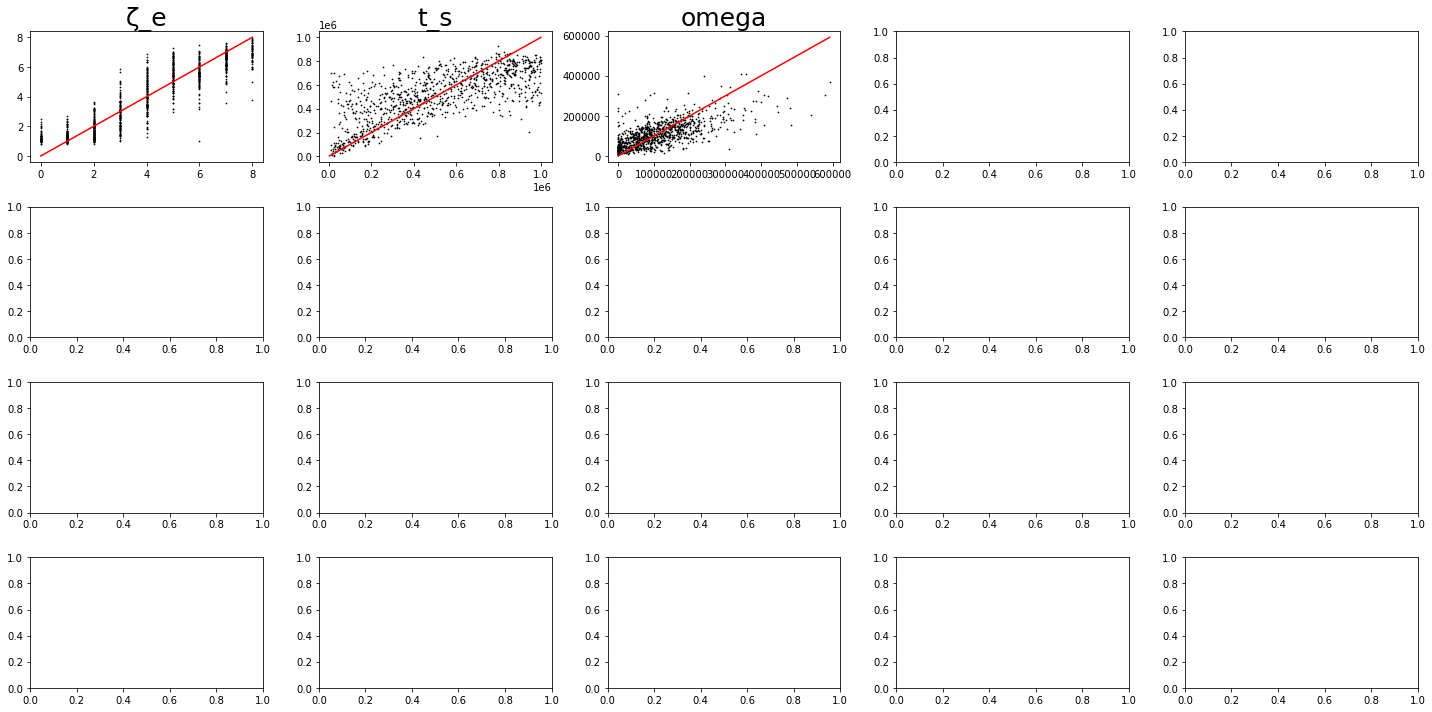

In [16]:
ax = gb_sorted.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

In [14]:
sorted_sim_df = pd.read_csv("./analysis/8pops_8samps_expanding_sims/expanding-sorted-props-SIMOUT.csv", sep=" ")
gb_sorted_cl = PTA.inference.Classifier(empirical_df=synthetic_community,
                                       sims=sorted_sim_df,
                                       algorithm="gb")
gb_sorted_cl.set_params(gb_params)
gb_sorted_cl.set_targets(["zeta_e"])
gb_sorted_cl.predict(select_features=False,\
            param_search=False,\
            quick=True,\
            verbose=True)
cv_preds = gb_sorted_cl.cross_val_predict(cv=3,
                    quick=True,
                    verbose=True)
gb_sorted_cl.plot_confusion_matrix()

Predict() started: 2021-11-14 21:02:36.399309
Predict() finished: 2021-11-15 01:00:39.039563
              precision    recall  f1-score   support

           0       0.22      0.03      0.05      7637
           1       0.43      0.57      0.49     15027
           2       0.35      0.35      0.35     15016
           3       0.42      0.47      0.44     14962
           4       0.43      0.43      0.43     14901
           5       0.38      0.36      0.37     14878
           6       0.36      0.32      0.34     14981
           7       0.41      0.51      0.45     15068
           8       0.46      0.43      0.44      7530

    accuracy                           0.40    120000
   macro avg       0.39      0.39      0.38    120000
weighted avg       0.39      0.40      0.39    120000



<AxesSubplot:xlabel='Predicted Ψ', ylabel='True Ψ'>

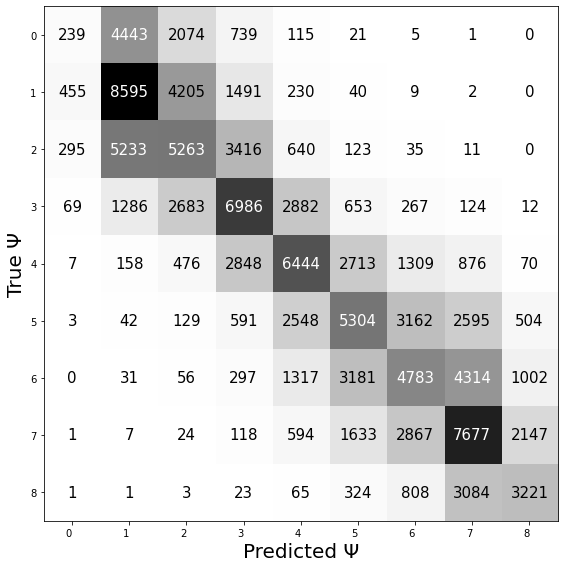

In [17]:
ax = gb_sorted_cl.plot_confusion_matrix()

## Predict zeta from empirical data

In [ ]:
%%time
expanding_sorted_msfs = PTA.msfs.multiSFS(exp_sfs, sort=True, proportions=True)
display(expanding_sorted_msfs.df)
display(expanding_sorted_msfs.to_dataframe())

sim_sorted_df = pd.read_csv("./analysis/8pops_8samps_expanding_sims/expanding-sorted-props-SIMOUT.csv", sep=" ")

gb_params = {'n_estimators': 1000,
             'min_samples_split': 5,
             'min_samples_leaf': 4,
             'max_features': 'auto',
             'max_depth': 10,
             'learning_rate': 0.012589254117941661}


gb_sorted = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
                                       sims=sim_sorted_df,
                                       algorithm="gb")
gb_sorted.set_targets(["zeta_e", "t_s", "omega"])
gb_sorted.set_params(gb_params)
gb_sorted_est = gb_sorted.predict(select_features=False,
                                     param_search=False,
                                     quick=False,
                                     verbose=True)
axs = gb_sorted.plot_feature_importance()

gb_sorted_est

,pop0,pop1,pop2,pop3,pop4,pop5,pop6,pop7
[[7_1]],0.713179,0.688062,0.681136,0.652572,0.562070,0.554598,0.513267,0.508127
[[6_2]],0.239843,0.230946,0.226319,0.223852,0.175918,0.172104,0.168348,0.134599
[[5_3]],0.174959,0.173487,0.152894,0.147902,0.119381,0.104578,0.103255,0.095835
[[4_4]],0.080827,0.078543,0.068655,0.063709,0.055943,0.048967,0.045937,0.040184


,pop0-[[7_1]],pop0-[[6_2]],pop0-[[5_3]],pop0-[[4_4]],pop1-[[7_1]],pop1-[[6_2]],pop1-[[5_3]],pop1-[[4_4]],pop2-[[7_1]],pop2-[[6_2]],pop2-[[5_3]],pop2-[[4_4]],pop3-[[7_1]],pop3-[[6_2]],pop3-[[5_3]],pop3-[[4_4]],pop4-[[7_1]],pop4-[[6_2]],pop4-[[5_3]],pop4-[[4_4]],pop5-[[7_1]],pop5-[[6_2]],pop5-[[5_3]],pop5-[[4_4]],pop6-[[7_1]],pop6-[[6_2]],pop6-[[5_3]],pop6-[[4_4]],pop7-[[7_1]],pop7-[[6_2]],pop7-[[5_3]],pop7-[[4_4]]
0,0.713179,0.239843,0.174959,0.080827,0.688062,0.230946,0.173487,0.078543,0.681136,0.226319,0.152894,0.068655,0.652572,0.223852,0.147902,0.063709,0.56207,0.175918,0.119381,0.055943,0.554598,0.172104,0.104578,0.048967,0.513267,0.168348,0.103255,0.045937,0.508127,0.134599,0.095835,0.040184


Predict() started: 2021-11-15 04:05:16.222972


,zeta_e,t_s,omega
estimate,3.163693,328985.598284,185943.688363
lower 0.025,0.704510,47548.480936,17307.500073
upper 0.975,8.000000,819979.911221,326816.836978


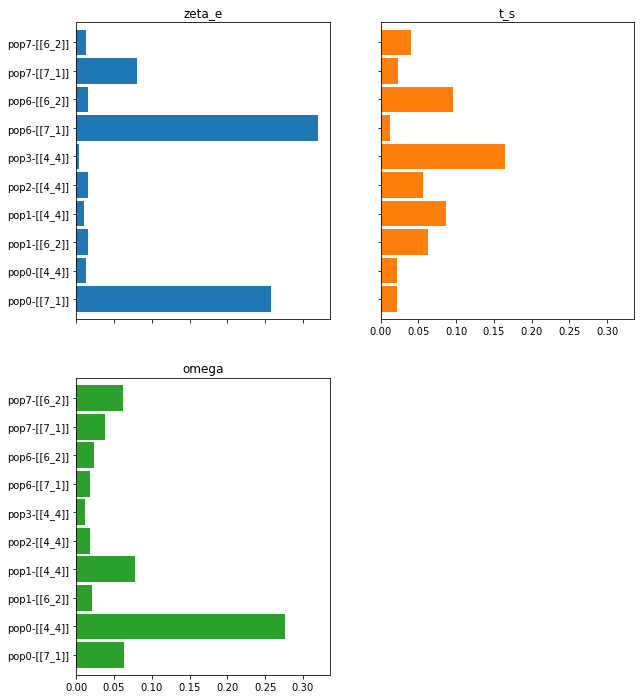

In [20]:
axs = gb_sorted.plot_feature_importance()

gb_sorted_est

Predict() started: 2021-11-15 07:42:43.216938
CPU times: user 91.3 ms, sys: 3.95 ms, total: 95.3 ms
Wall time: 93.5 ms


(          zeta_e
 estimate       4,
                0         1         2         3         4         5         6  \
 zeta_e  0.015135  0.058484  0.148351  0.144327  0.606141  0.015831  0.007286   
 
                7         8  
 zeta_e  0.003415  0.001029  )

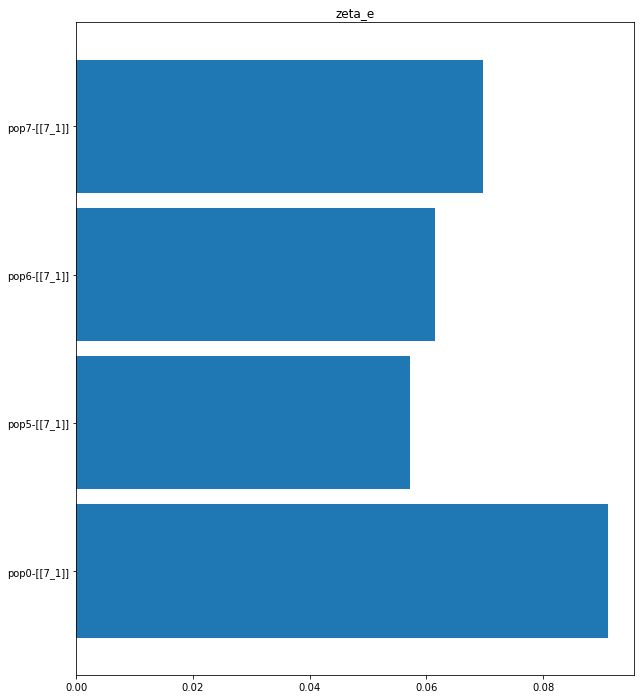

In [21]:
%%time
gb_sorted_cl.set_data(expanding_sorted_msfs.to_dataframe())
gb_class_est = gb_sorted_cl.predict(select_features=False,\
                                    param_search=False,\
                                    quick=True,\
                                    verbose=True)
axs = gb_sorted_cl.plot_feature_importance()
gb_class_est

<BarContainer object of 9 artists>

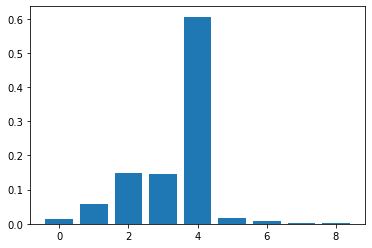

In [25]:

plt.bar(np.arange(9), gb_class_est[1].values[0])

## Stop here

## RF Quantile

## Unsorted summary statistics

In [6]:
expanding_unsorted_msfs = PTA.msfs.multiSFS(exp_sfs, sort=False, proportions=True)
display(expanding_unsorted_msfs.df)
display(expanding_unsorted_msfs.to_dataframe())

sim_unsorted_df = pd.read_csv("./analysis/8pops_8samps_expanding_sims/time_in_years/expanding-unsorted-props-SIMOUT.csv", sep=" ")
print(len(sim_unsorted_df))

,pop0,pop1,pop2,pop3,pop4,pop5,pop6,pop7
[[7_1]],0.508127,0.713179,0.688062,0.681136,0.652572,0.562070,0.554598,0.513267
[[6_2]],0.239843,0.134599,0.175918,0.168348,0.172104,0.226319,0.223852,0.230946
[[5_3]],0.173487,0.103255,0.095835,0.104578,0.119381,0.147902,0.152894,0.174959
[[4_4]],0.078543,0.048967,0.040184,0.045937,0.055943,0.063709,0.068655,0.080827


,pop0-[[7_1]],pop0-[[6_2]],pop0-[[5_3]],pop0-[[4_4]],pop1-[[7_1]],pop1-[[6_2]],pop1-[[5_3]],pop1-[[4_4]],pop2-[[7_1]],pop2-[[6_2]],pop2-[[5_3]],pop2-[[4_4]],pop3-[[7_1]],pop3-[[6_2]],pop3-[[5_3]],pop3-[[4_4]],pop4-[[7_1]],pop4-[[6_2]],pop4-[[5_3]],pop4-[[4_4]],pop5-[[7_1]],pop5-[[6_2]],pop5-[[5_3]],pop5-[[4_4]],pop6-[[7_1]],pop6-[[6_2]],pop6-[[5_3]],pop6-[[4_4]],pop7-[[7_1]],pop7-[[6_2]],pop7-[[5_3]],pop7-[[4_4]]
0,0.508127,0.239843,0.173487,0.078543,0.713179,0.134599,0.103255,0.048967,0.688062,0.175918,0.095835,0.040184,0.681136,0.168348,0.104578,0.045937,0.652572,0.172104,0.119381,0.055943,0.56207,0.226319,0.147902,0.063709,0.554598,0.223852,0.152894,0.068655,0.513267,0.230946,0.174959,0.080827


40000


In [8]:
## rfq doesn't like some of the stock rf params above
rgrq_params = {'max_depth': 70,
    'min_samples_leaf': 4,
    'min_samples_split': 5,
    'n_estimators': 1400,
    'n_jobs': -1,
}

print(datetime.datetime.now())
rgr_unsorted = PTA.inference.Regressor(empirical_df=expanding_unsorted_msfs.to_dataframe(),
                                       sims=sim_unsorted_df)
rgr_unsorted.set_params(rgrq_params)
rgr_unsorted.set_targets(["zeta_e", "t_s", "omega"])
est_unsorted = rgr_unsorted.predict(select_features=False,
                                    param_search=False,
                                    quick=True,
                                    verbose=False)
print(datetime.datetime.now())
est_unsorted

2021-11-14 08:43:23.818684
2021-11-14 10:23:55.870330


,zeta_e,t_s,omega
estimate,2.629643,515485.465695,189561.203203
lower 0.025,0.000000,15340.608287,0.000000
upper 0.975,7.000000,990072.852273,434569.692311


In [9]:
axs = rgr_unsorted.plot_feature_importance()

## Sorted summary statistics

In [7]:
expanding_sorted_msfs = PTA.msfs.multiSFS(exp_sfs, sort=True, proportions=True)
display(expanding_sorted_msfs.df)
display(expanding_sorted_msfs.to_dataframe())

sim_sorted_df = pd.read_csv("./analysis/8pops_8samps_expanding_sims/time_in_years/expanding-sorted-props-SIMOUT.csv", sep=" ")
print(len(sim_sorted_df))

,pop0,pop1,pop2,pop3,pop4,pop5,pop6,pop7
[[7_1]],0.713179,0.688062,0.681136,0.652572,0.562070,0.554598,0.513267,0.508127
[[6_2]],0.239843,0.230946,0.226319,0.223852,0.175918,0.172104,0.168348,0.134599
[[5_3]],0.174959,0.173487,0.152894,0.147902,0.119381,0.104578,0.103255,0.095835
[[4_4]],0.080827,0.078543,0.068655,0.063709,0.055943,0.048967,0.045937,0.040184


,pop0-[[7_1]],pop0-[[6_2]],pop0-[[5_3]],pop0-[[4_4]],pop1-[[7_1]],pop1-[[6_2]],pop1-[[5_3]],pop1-[[4_4]],pop2-[[7_1]],pop2-[[6_2]],pop2-[[5_3]],pop2-[[4_4]],pop3-[[7_1]],pop3-[[6_2]],pop3-[[5_3]],pop3-[[4_4]],pop4-[[7_1]],pop4-[[6_2]],pop4-[[5_3]],pop4-[[4_4]],pop5-[[7_1]],pop5-[[6_2]],pop5-[[5_3]],pop5-[[4_4]],pop6-[[7_1]],pop6-[[6_2]],pop6-[[5_3]],pop6-[[4_4]],pop7-[[7_1]],pop7-[[6_2]],pop7-[[5_3]],pop7-[[4_4]]
0,0.713179,0.239843,0.174959,0.080827,0.688062,0.230946,0.173487,0.078543,0.681136,0.226319,0.152894,0.068655,0.652572,0.223852,0.147902,0.063709,0.56207,0.175918,0.119381,0.055943,0.554598,0.172104,0.104578,0.048967,0.513267,0.168348,0.103255,0.045937,0.508127,0.134599,0.095835,0.040184


40000


In [11]:
 
rgr = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
                              sims=sim_sorted_df)
rgr.set_params(rgrq_params)
est = rgr.predict(select_features=False, param_search=False, quick=True, verbose=False)
est

,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
estimate,0.913249,7.570686,0.975156,471607.365583,0.023047,574738.033201,79922.060835,0.003467,-2.671569,563761.472246,98144.564409,9.075726,1.672777,-0.001359,-2.659492,9.315626,1.828270,442588.151097,271315.795364,0.105452,-0.500979,440269.948056,417990.730617
lower 0.025,0.703627,6.000000,0.686892,31970.284165,0.000000,77150.773154,0.000000,-0.699000,-3.000000,146261.424285,0.000000,2.728016,0.000000,-0.685379,-3.000000,2.668063,0.000000,272895.485987,109291.159311,-1.191724,-1.677097,184697.017760,123281.077273
upper 0.975,0.995339,8.000000,1.000000,962619.812588,0.440719,975684.020371,403349.492369,0.949154,-1.500000,967200.549635,453785.226025,18.951818,7.095621,0.704000,-1.500000,18.935674,8.476829,743743.362907,359480.446097,1.465142,1.922384,821935.216479,724996.458863


,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
estimate,0.913249,7.570686,0.975156,471607.365583,0.023047,574738.033201,79922.060835,0.003467,-2.671569,563761.472246,98144.564409,9.075726,1.672777,-0.001359,-2.659492,9.315626,1.828270,442588.151097,271315.795364,0.105452,-0.500979,440269.948056,417990.730617
lower 0.025,0.703627,6.000000,0.686892,31970.284165,0.000000,77150.773154,0.000000,-0.699000,-3.000000,146261.424285,0.000000,2.728016,0.000000,-0.685379,-3.000000,2.668063,0.000000,272895.485987,109291.159311,-1.191724,-1.677097,184697.017760,123281.077273
upper 0.975,0.995339,8.000000,1.000000,962619.812588,0.440719,975684.020371,403349.492369,0.949154,-1.500000,967200.549635,453785.226025,18.951818,7.095621,0.704000,-1.500000,18.935674,8.476829,743743.362907,359480.446097,1.465142,1.922384,821935.216479,724996.458863


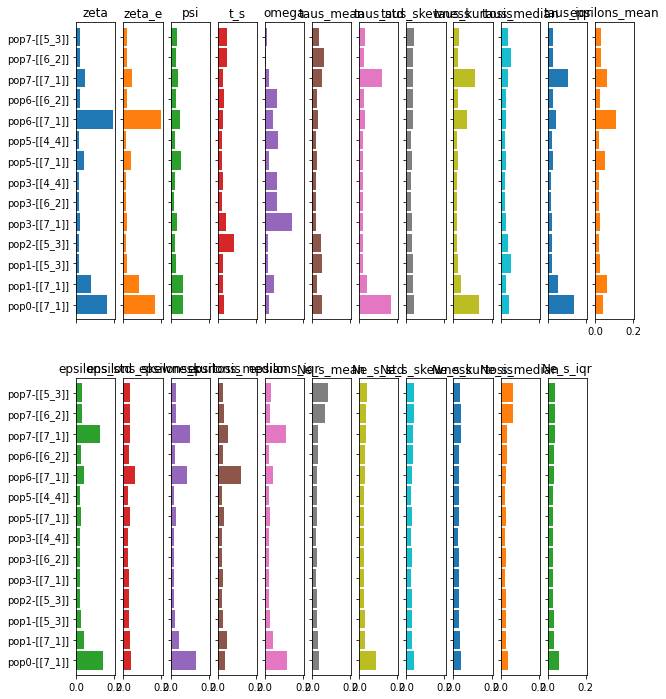

In [14]:
display(est)
axs = rgr.plot_feature_importance()

# RandomForest

In [ ]:
## parameters from a cv_search process which took like a day, don't want to redo it.
rgr_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Unsorted

    w/ quick=True
    2021-09-16 10:23:53.176613
    2021-09-16 10:26:10.980052
    
                  zeta_e	t_s    omega
    estimate	5.546885	491896.23111	0.000291

2021-09-16 10:32:02.732011
2021-09-16 10:34:16.433432


,zeta_e,t_s,omega
estimate,5.570182,511872.977605,0.000146


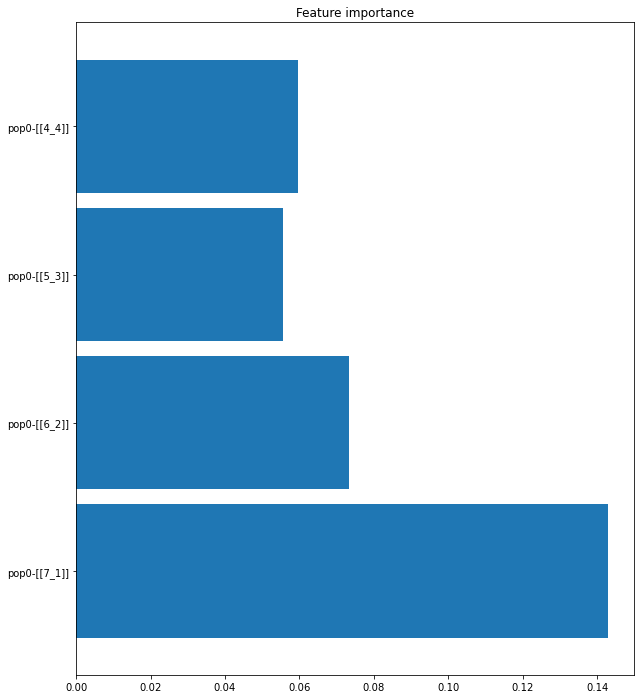

In [30]:
print(datetime.datetime.now())
rfrgr_unsorted = PTA.inference.Regressor(empirical_df=expanding_unsorted_msfs.to_dataframe(),
                                       sims=sim_unsorted_df,
                                       algorithm="rf")
rfrgr_unsorted.set_params(rgr_params)
rfrgr_unsorted.set_targets(["zeta_e", "t_s", "omega"])
rfest_unsorted = rfrgr_unsorted.predict(select_features=False,
                                        param_search=False,
                                        quick=False,
                                        verbose=False)
axs = rfrgr_unsorted.plot_feature_importance()
print(datetime.datetime.now())
rfest_unsorted

## Sorted

2021-09-16 10:26:48.683367
2021-09-16 10:27:35.700765


,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
estimate,0.919058,7.498678,1.0,562300.646591,0.000237,529919.236914,63507.039815,0.013191,-2.573644,527670.62406,68763.692536,9.001999,1.199052,0.018966,-2.576952,8.882011,1.293557,444506.0802,288094.450701,0.074864,-0.998961,436420.442863,424836.252765


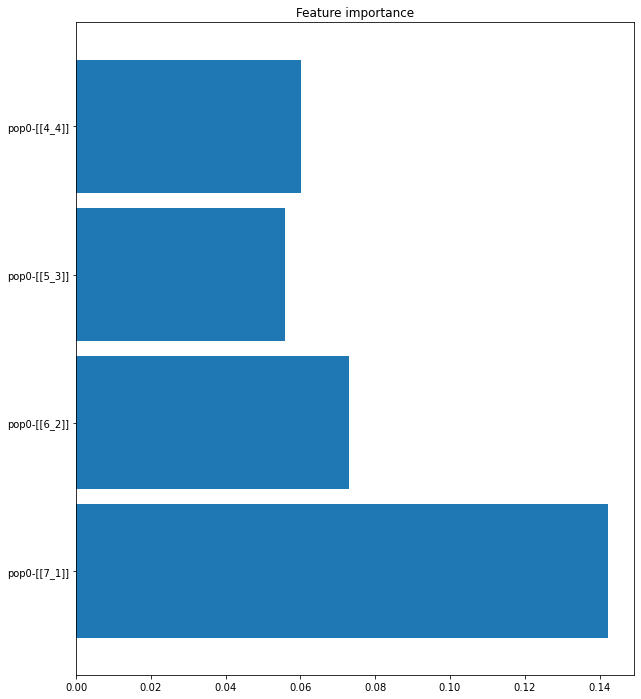

In [29]:
print(datetime.datetime.now())
rfrgr = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
                              sims=sim_sorted_df,
                              algorithm="rf")
rfrgr.set_params(rgr_params)
rfrgr_unsorted.set_targets(["zeta_e", "t_s", "omega"])
rfest_sorted = rfrgr.predict(select_features=False,
                             param_search=False,
                             quick=True,
                             verbose=False)
axs = rfrgr_unsorted.plot_feature_importance()
print(datetime.datetime.now())
rfest_sorted

# GB

```
Best params for zeta_e: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'learning_rate': 0.012589254117941661}

Best params for t_s: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'learning_rate': 0.0025118864315095794}
```

In [10]:
gb_params = {'n_estimators': 1000,
             'min_samples_split': 5,
             'min_samples_leaf': 4,
             'max_features': 'auto',
             'max_depth': 10,
             'learning_rate': 0.012589254117941661}

## Unsorted

In [11]:
print(datetime.datetime.now())
gb_unsorted = PTA.inference.Regressor(empirical_df=expanding_unsorted_msfs.to_dataframe(),
                                       sims=sim_unsorted_df,
                                       algorithm="gb")
gb_unsorted.set_targets(["zeta_e", "t_s", "omega"])
gb_unsorted.set_params(gb_params)
gb_unsorted_est = gb_unsorted.predict(select_features=False,
                                     param_search=False,
                                     quick=False,
                                     verbose=True)
axs = gb_unsorted.plot_feature_importance()
print(datetime.datetime.now())
gb_unsorted_est

2021-11-14 05:03:12.064021
Predict() started: 2021-11-14 05:03:12.094356
Predict() finished: 2021-11-14 05:32:35.213929
Calculating prediction interval(s)
	zeta_e
	t_s
	omega
2021-11-14 06:31:15.317381


,zeta_e,t_s,omega
estimate,1.843346,514344.718887,169701.905038
lower 0.025,0.250150,24212.828328,40102.962476
upper 0.975,6.602692,926759.796947,342330.147558


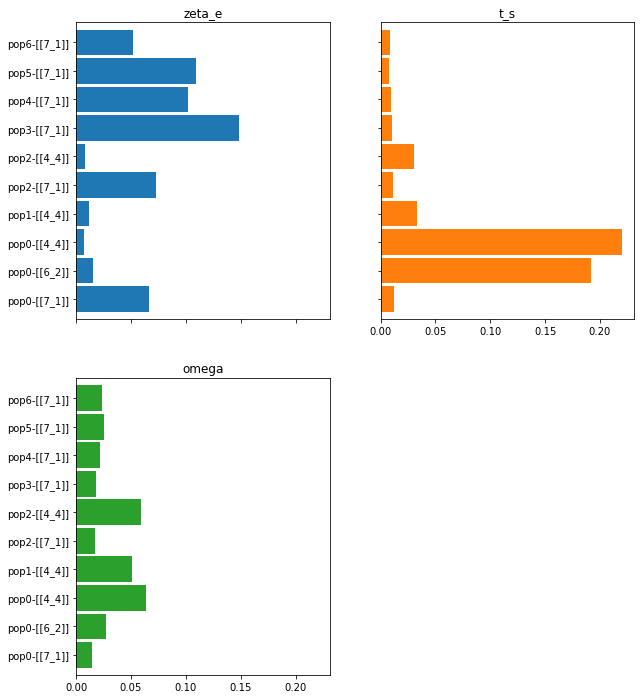

In [15]:
axs = gb_unsorted.plot_feature_importance()


## Sorted

In [12]:
print(datetime.datetime.now())

gb_params = {'n_estimators': 1000,
             'min_samples_split': 5,
             'min_samples_leaf': 4,
             'max_features': 'auto',
             'max_depth': 10,
             'learning_rate': 0.012589254117941661}

gb_sorted = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
                                       sims=sim_sorted_df,
                                       algorithm="gb")
gb_sorted.set_targets(["zeta_e", "t_s", "omega"])
gb_sorted.set_params(gb_params)
gb_sorted_est = gb_sorted.predict(select_features=False,
                                     param_search=False,
                                     quick=False,
                                     verbose=True)
axs = gb_sorted.plot_feature_importance()
print(datetime.datetime.now())
gb_sorted_est

2021-11-14 06:31:15.458794
Predict() started: 2021-11-14 06:31:15.501820
Predict() finished: 2021-11-14 06:57:26.250948
Calculating prediction interval(s)
	zeta_e
	t_s
	omega
2021-11-14 07:53:13.067788


,zeta_e,t_s,omega
estimate,3.109540,505843.444110,168103.495999
lower 0.025,1.417752,32463.041867,28593.029260
upper 0.975,5.869906,901508.377430,347981.800273


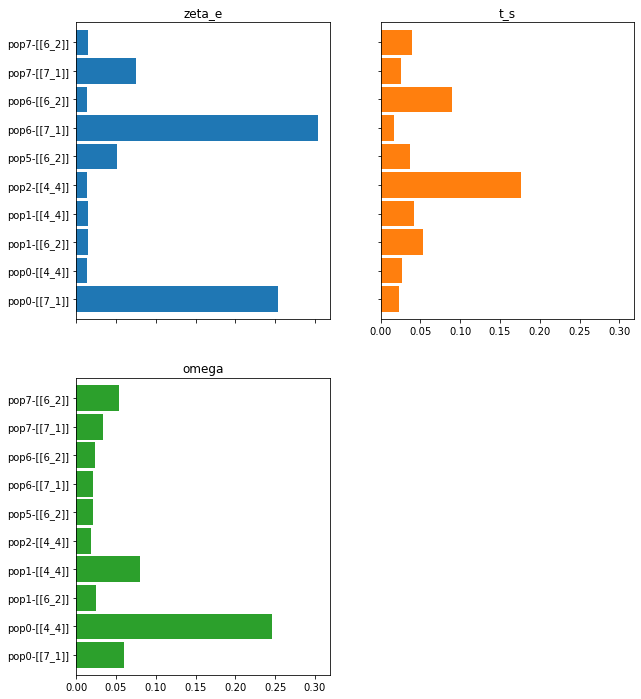

In [14]:
axs = gb_sorted.plot_feature_importance()
